In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
# Load dataset
data = pd.read_csv("1429_1.csv")

C:\Users\91772\AppData\Local\Temp\ipykernel_12756\3641231958.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("1429_1.csv")


In [3]:
data.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [4]:
# Section 1: Data Preparation and Preprocessing
# Remove irrelevant columns
data.drop(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.sourceURLs',
        'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'], axis=1, inplace=True)

In [5]:
data[11:]

,reviews.rating,reviews.text
11,5.0,"Excellent product. Easy to use, large screen m..."
12,4.0,Wanted my father to have his first tablet and ...
13,5.0,Simply does everything I need. Thank youAnd si...
14,5.0,Got it as a present and love the size of the s...
15,5.0,"The kindle is easiest to use, graphics and scr..."
...,...,...
34655,3.0,This is not appreciably faster than any other ...
34656,1.0,Amazon should include this charger with the Ki...
34657,1.0,Love my Kindle Fire but I am really disappoint...
34658,1.0,I was surprised to find it did not come with a...


In [6]:
data['reviews.rating']=data['reviews.rating'].replace([1,2,3], 0)
data['reviews.rating'] = data['reviews.rating'].replace([4,5], 1)

In [7]:
data.head()

,reviews.rating,reviews.text
0,1.0,This product so far has not disappointed. My c...
1,1.0,great for beginner or experienced person. Boug...
2,1.0,Inexpensive tablet for him to use and learn on...
3,1.0,I've had my Fire HD 8 two weeks now and I love...
4,1.0,I bought this for my grand daughter when she c...


In [8]:
# Remove duplicates
data['Text'] = data['reviews.text']
data.drop_duplicates(subset=['Text'], inplace=True)

In [9]:
# Remove non-alphanumeric characters and convert to lowercase
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

In [10]:
# Remove stop words
stop_words = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [11]:
# Stem the words
stemmer = PorterStemmer()
data['Text'] = data['Text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [12]:
data.head()

,reviews.rating,reviews.text,Text
0,1.0,This product so far has not disappointed. My c...,product far disappoint children love use like ...
1,1.0,great for beginner or experienced person. Boug...,great beginn experienc person bought gift love
2,1.0,Inexpensive tablet for him to use and learn on...,inexpens tablet use learn step nabi thrill lea...
3,1.0,I've had my Fire HD 8 two weeks now and I love...,ive fire hd 8 two week love tablet great value...
4,1.0,I bought this for my grand daughter when she c...,bought grand daughter come visit set user ente...


<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

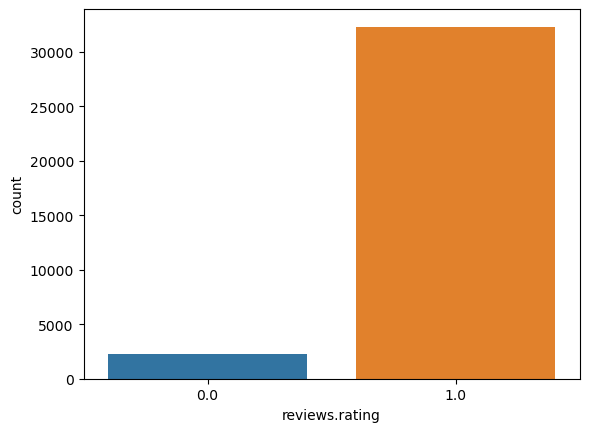

In [13]:
# Section 2: Exploratory Data Analysis (EDA)
# Analyze the distribution of ratings and sentiments in the dataset

sns.countplot(x='reviews.rating', data=data)

In [14]:
# Perform statistical analysis such as mean, median, and mode of ratings
data['Score'] = data['reviews.rating']
print('Mean Score:', data['Score'].mean())
print('Median Score:', data['Score'].median())
print('Mode Score:', data['Score'].mode())

Mean Score: 0.9332601726976059
Median Score: 1.0
Mode Score: 0    1.0
Name: Score, dtype: float64


In [15]:
data = data.drop(['reviews.text'],axis =1)

In [16]:
data = data.dropna()

In [17]:
data.head()

,reviews.rating,Text,Score
0,1.0,product far disappoint children love use like ...,1.0
1,1.0,great beginn experienc person bought gift love,1.0
2,1.0,inexpens tablet use learn step nabi thrill lea...,1.0
3,1.0,ive fire hd 8 two week love tablet great value...,1.0
4,1.0,bought grand daughter come visit set user ente...,1.0


In [18]:
x = data['Text']
y = data['Score']

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42, test_size=0.2)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
v = TfidfVectorizer()

In [22]:
x_train_cv = v.fit_transform(x_train)

In [23]:
x_train_cv

<27701x12213 sparse matrix of type '<class 'numpy.float64'>'
	with 385278 stored elements in Compressed Sparse Row format>

In [24]:
data.isnull().sum()

reviews.rating    0
Text              0
Score             0
dtype: int64

In [25]:
x_train_np = x_train_cv.toarray()

In [26]:
v.get_feature_names_out().shape

(12213,)

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model =MultinomialNB()

In [29]:
model.fit(x_train_cv,y_train)

MultinomialNB()

In [30]:
x_test_cv= v.transform(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_pred =model.predict(x_test_cv)

In [33]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       472
         1.0       0.93      1.00      0.96      6454

    accuracy                           0.93      6926
   macro avg       0.47      0.50      0.48      6926
weighted avg       0.87      0.93      0.90      6926



In [35]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [36]:
model2.fit(x_train_cv,y_train)
y_pred =model2.predict(x_test_cv)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.17      0.27       472
         1.0       0.94      1.00      0.97      6454

    accuracy                           0.94      6926
   macro avg       0.86      0.58      0.62      6926
weighted avg       0.93      0.94      0.92      6926



In [38]:
sd = ['dispointed']
sd =v.transform(sd)
model2.predict(sd)

array([1.])